In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
#The scalar class that holds all the values, handles all the operations, keeps track of its parent values, and also its operations

class Value:
    def __init__(self, data):
        self.data = data
    def __repr__(self):
        return (f"Data = {self.data}")

In [5]:
a = Value(5.0)
a

Value = 5.0

In [ ]:
#Add addition and multiplication functionality 
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return (f"Data = {self.data}")

    def __add__(self, other):
        out = self.data + other.data
        return Value(out)
    
    def __mul__(self, other):
        out = self.data * other.data
        return Value(out)

In [14]:
a = Value(5.0)
b = Value(-2.0)

c = a + b
c

Value = 3.0

In [ ]:
#Add functionality to track previous values
class Value:
    def __init__(self, data, _children=()):
        self.data = data
        self.prev = set(_children)

    def __repr__(self):
        return (f"Data = {self.data}")

    def __add__(self, other):
        out = self.data + other.data
        return Value(out, (self, other))

    def __mul__(self, other):
        out = self.data * other.data
        return Value(out, (self, other))

In [19]:
a = Value(9)
b = Value(2)
c = Value(-10)
d = a*b + c
d.prev

{Value = -10, Value = 18}

In [22]:
#Add functionality to track operation leading to the present value
class Value:
    def __init__(self, _data, _children=(), _operation = ''):
        self.data = _data
        self.prev = set(_children)
        self.operation = _operation

    def __repr__(self):
        return (f"Data = {self.data}")

    def __add__(self, other):
        out = self.data + other.data
        return Value(out, (self, other), '+')

    def __mul__(self, other):
        out = self.data * other.data
        return Value(out, (self, other), '-')
    

In [23]:
a = Value(9)
b = Value(2)
c = Value(-10)
d = a*b + c
d.operation

'+'

Now we need to visualise the nodes and operations. This would help us understand the nodes and back track better.

In [5]:
!pip3 install graphviz
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format = 'svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{ data %4f}" % (n.data, ), shape = 'record')
        if n.operation:
            dot.node(name = uid + n.operation, label = n.operation)
            dot.edge(uid + n.operation, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2.operation)

    return dot

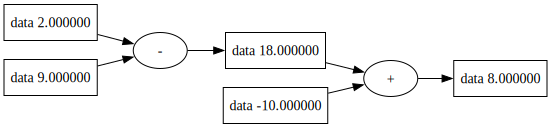

In [34]:
draw_dot(d)

In [15]:
#Adding a label variable
class Value:
    def __init__(self, _data, _children=(), _operation = '', label = ''):
        self.data = _data
        self.prev = set(_children)
        self.operation = _operation
        self.label = label

    def __repr__(self):
        return (f"Data = {self.data}")

    def __add__(self, other):
        out = self.data + other.data
        return Value(out, (self, other), '+')

    def __mul__(self, other):
        out = self.data * other.data
        return Value(out, (self, other), '')
    

In [27]:
!pip3 install graphviz
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format = 'svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{ %s | %4f}" % (n.label, n.data, ), shape = 'record')
        if n.operation:
            dot.node(name = uid + n.operation, label = n.operation)
            dot.edge(uid + n.operation, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2.operation)

    return dot

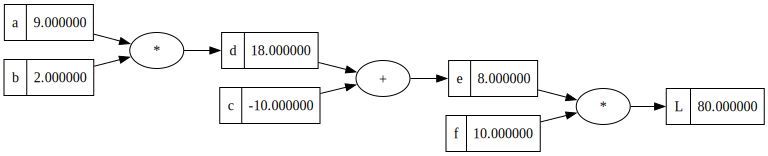

In [17]:
a = Value(9, label= 'a')
b = Value(2, label= 'b')
c = Value(-10, label= 'c')
d = a*b ; d.label = 'd'
e = d+c ; e.label = 'e'
f = Value(10, label='f') 
L = e*f ; L.label = 'L'

draw_dot(L)

In [32]:
#Adding tanh and ** operation
import math
class Value:
    def __init__(self, _data, _children=(), _operation = '', label = ''):
        self.data = _data
        self.prev = set(_children)
        self.operation = _operation
        self.label = label

    def __repr__(self):
        return (f"Data = {self.data}")

    def __add__(self, other):
        out = self.data + other.data
        return Value(out, (self, other), '+')
    
    def tanh(self):
        out = (math.exp(2*self.data) - 1)/(math.exp(2*self.data) - 1)
        return Value(out, (self, ), 'tanh')

    def __pow__(self, exp):
        out = self.value ** exp
        return Value(out, (self, ), '**')

    def __mul__(self, other):
        out = self.data * other.data    
        return Value(out, (self, other), '*')
    

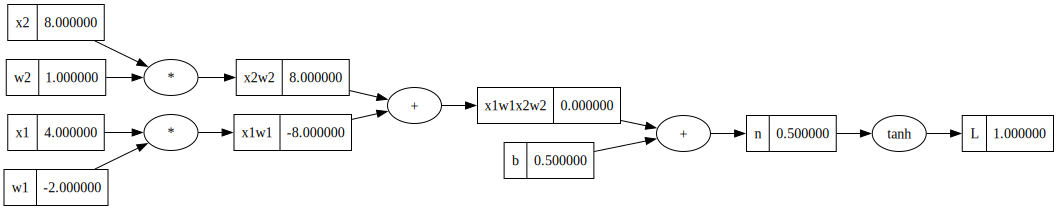

In [33]:
#Simulating a single neuron

#inputs
x1 = Value(4.0, label='x1')
x2 = Value(8.0, label='x2')

#weights
w1 = Value (-2.0, label='w1')
w2 = Value (1.0, label='w2')

#bias
b = Value(0.5, label = "b")

#Output before and after activation
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label='n'
L = n.tanh(); L.label='L'

draw_dot(L)

In [83]:
#Adding gradients (Partial Derivatives in particular) for backpropagation.
'''
First we define a gradient variable, grad. grad is 0 at initialisation since it doesnot affect any other variables currently.
To keep track of the derivative of a node, we update each node's gradient when an operation is performed to create new variable.
This follows the chain rule. At each operation, the gradient of the variable is updated 
'''
class Value:
    def __init__(self, _data, _children=(), _operation = '', label = ''):
        self.data = _data
        self.grad = 0
        self.prev = set(_children)
        self._backprop = lambda: None
        self.operation = _operation
        self.label = label

    def __repr__(self):
        return (f"{self.label} = {self.data}")
    
    def backprop(self):
        self.grad = 1.0
        topo = []
        visited = []
        def build_topo(v):
            if v not in visited:
                visited.append(v)
                for child in v.prev:
                    child.grad=0  #To ensure gradient of all nodes is 0 before calling backpropagate
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        for current in reversed(topo):

            current._backprop()

    def __add__(self, other):
        out_data = self.data + other.data
        out = Value(out_data, (self, other), '+')

        def _backprop():
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad
        out._backprop = _backprop

        return out

    def __mul__(self, other):
        out_data = self.data * other.data
        out = Value(out_data, (self, other), '*')

        def _backprop():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backprop = _backprop

        return out
    
    def tanh(self):
        out_data = (math.exp(2*self.data) - 1)/(math.exp(2*self.data) + 1)
        out = Value(out_data, (self, ), 'tanh')

        def _backprop():
            self.grad += (1 - out_data**2) * out.grad
        out._backprop = _backprop

        return out

    def __pow__(self, exp):
        out_data = self.value ** exp
        out = Value(out_data, (self, ), '**')

        def _backprop():
            self.grad += (exp * self.data ** (exp-1)) * out.grad
        out._backprop = _backprop

        return out
    

In [73]:
#Also need the graph to show gradients
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format = 'svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{ %s | %4f | Gradient: %2f}" % (n.label, n.data, n.grad), shape = 'record')
        if n.operation:
            dot.node(name = uid + n.operation, label = n.operation)
            dot.edge(uid + n.operation, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2.operation)

    return dot

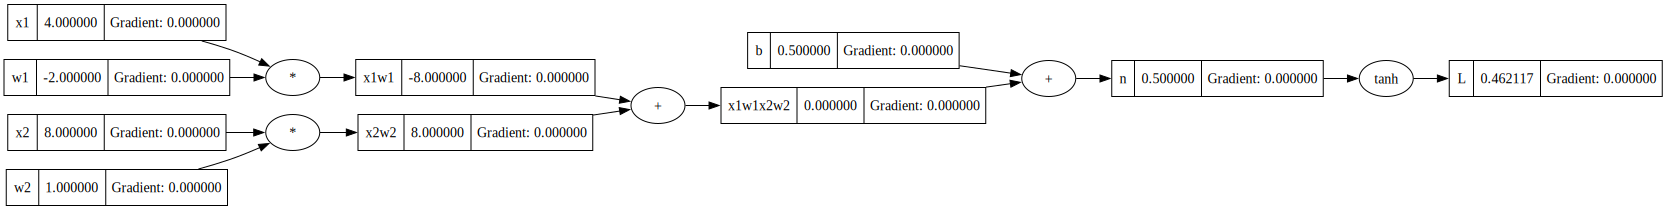

In [85]:
#Simulating a single neuron, Same as before

#inputs
x1 = Value(4.0, label='x1')
x2 = Value(8.0, label='x2')

#weights
w1 = Value (-2.0, label='w1')
w2 = Value (1.0, label='w2')

#bias
b = Value(0.5, label = "b")

#Output before and after activation
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label='n'
L = n.tanh(); L.label='L'

draw_dot(L)

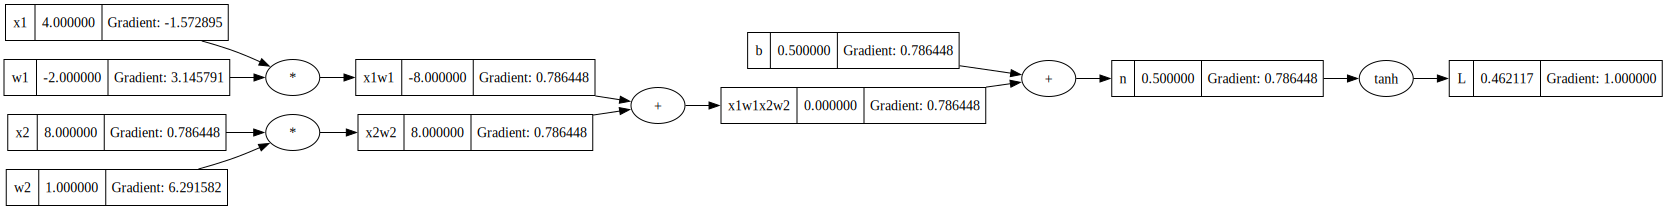

In [91]:
#Calling the automatic back propagation function
L.backprop()
draw_dot(L)

In [ ]:
#Adding reverse arithematic operations and implicit type cast support
import math
class Value:
    def __init__(self, _data, _children=(), _operation = '', label = ''):
        self.data = _data
        self.grad = 0
        self.prev = set(_children)
        self._backprop = lambda: None
        self.operation = _operation
        self.label = label

    def __repr__(self):
        return (f"{self.label} = {self.data}")
    
    def backprop(self):
        self.grad = 1.0
        topo = []
        visited = {}
        def build_topo(v):
            if v not in visited:
                visited.append(v)
                for child in v.prev:
                    child.grad=0  #To ensure gradient of all nodes is 0 before calling backpropagate
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        for current in reversed(topo):

            current._backprop()

    def __neg__(self):
        return self * -1
    
    def __sub__(self, other):
        return self + -(other)

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out_data = self.data + other.data
        out = Value(out_data, (self, other), '+')

        def _backprop():
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad
        out._backprop = _backprop

        return out
    
    def __radd__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out_data = self.data * other.data
        out = Value(out_data, (self, other), '*')

        def _backprop():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backprop = _backprop

        return out
    
    def __rmul__(self, other):
        return self * other
    

    
    def tanh(self):
        out_data = (math.exp(2*self.data) - 1)/(math.exp(2*self.data) + 1)
        out = Value(out_data, (self, ), 'tanh')

        def _backprop():
            self.grad += (1 - out_data**2) * out.grad
        out._backprop = _backprop

        return out

    def __pow__(self, exp):
        assert isinstance(exp, (int, float))
        out_data = self.data ** exp
        out = Value(out_data, (self, ), '**')

        def _backprop():
            self.grad += (exp * self.data ** (exp-1)) * out.grad
        out._backprop = _backprop

        return out
    
    def exp(self):
        out_data = math.exp(self.data)
        out = Value(out_data, (self, ), "exp")

        def _backprop():
            self.grad += out_data * out.grad
        out._backprop = _backprop

        return out

    def __truediv__(self,other):
        other = other if isinstance(other, Value) else Value(other)
        out_data = self.data / other.data
        out = Value(out_data, (self, other), '/')

        def _backprop():
            self.grad += (1 / other.data) * out.grad
            other.grad += (-self.data / (other.data**2)) * out.grad
        out._backprop = _backprop

        return out
    